# 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

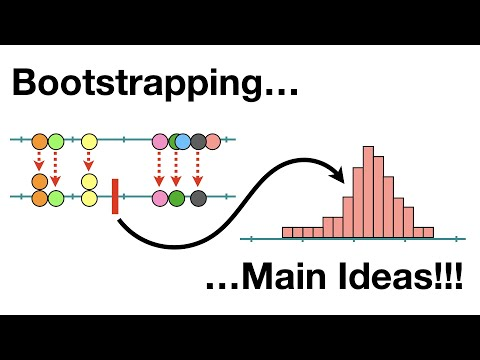

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The standard error of the mean is when you redo the the experiment by doing the bootstrapped disterbution, and looking at the difference of the original mean and the new mean gotten by the bootstrapped method.To  know how to calculate this standard error of the mean, we calculate the standard deviation of the bootstrapped mean. Even though the standard error of the mean can be calculated without bootstrapping, using bootstrapping shows every posibilty of the mean and it can be used on ANY type of statstics. Using bootstrapping, we can "interpert the initial results".

# 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

When we calculate the median of the original data, we can use bootstrapping to calculate the standard error of the mean. When this is done, we use the new made disterbution (standard error of the mean) to create the confidence interval. Then this "95% confidence interval" covers 95% of the standard error of the mean which does not allow us to reject the hypothesis of the original topic.

# 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

We calculate the sample means and take two parts of the percetages which are 2.5% and 97.5%. Between these two percetages is the 95% that we want for the confidence interval.

# 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [2]:
import numpy as np

# Function to compute bootstrap confidence intervals
def bootstrap_confidence_interval(data, stat_func=np.mean, n_bootstrap=1000, ci=95):
    """
    Compute the bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: array-like, the sample data.
    - stat_func: the statistic function to be bootstrapped (e.g., np.mean, np.median).
    - n_bootstrap: number of bootstrap samples.
    - ci: desired confidence interval level (e.g., 95 for 95% CI).
    
    Returns:
    - lower_bound, upper_bound: the bounds of the confidence interval.
    """
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_samples = [stat_func(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
    
    # Compute percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_samples, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_samples, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Sample data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Compute 95% bootstrap confidence interval for the mean
mean_ci_lower, mean_ci_upper = bootstrap_confidence_interval(data)
print(f"95% Bootstrap CI for the mean: [{mean_ci_lower}, {mean_ci_upper}]")

# To compute the 95% bootstrap confidence interval for the median, 
# simply change the stat_func parameter to np.median
median_ci_lower, median_ci_upper = bootstrap_confidence_interval(data, stat_func=np.median)
print(f"95% Bootstrap CI for the median: [{median_ci_lower}, {median_ci_upper}]")


95% Bootstrap CI for the mean: [3.8, 7.3]
95% Bootstrap CI for the median: [2.5, 8.0]


The parameter to change is the "stat_func" and switching "np.mean" to "np.median", the code makes a 95% confidence interval for the population using the median and not the mean.

# 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The key reason for the differentiation between the parameter and statistic is that the former is a fixed, yet unknown value describing the whole population, whereas the sample statistic can only be an estimate based on the finite sample derived from the population. In light of this view, confidence intervals are constructed around the point sample statistic for an estimate of the range within which the true population parameter is likely to lie. This discrepancy is important in that the width of the confidence interval reflects the uncertainty of the estimate made about the population based on the sample.

# 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

## 1. What is the process of bootstrapping?

## 2.What is the main purpose of bootstrapping?

## 3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. So bootstrapping basically is taking statistics from a line plot and putting in a new line plot as many times as there are statistics. Even if some of these values are repeated, we still take them. We repeate this thousands of times until we have fulfilled every possible way to this method. We then calculate the mean of these new charts.

2. We do bootstrapping to find which results are the more likely to happen again and which results are not likely to happen again in terms of the original data set mean.

3. We use the bootstrapping method to caculate the standard error of the mean and then use the 95% confidence interval to see if they overlap. The standard error of the mean can be calculated by using the median of the original mean of the original dataset. The confidence interval just splits the new mean into 2.5% and 97.5% and then finds the 95% inbetween and the we use it to compare with the original dataset's mean.

# 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

 It fails to reject the null hypothesis because the original mean was close to but not equal to 0 and new mean that we found while doing the bootstrapping method, used the 95% confidence interval to find where it would overlap with the original mean, which was at 0. While rejecting the null hypothses is deduced by checking if the confidence level "does not overlap 0". Which means that there strong evidence that actual effects are different from 0 concluding that the statistics are different.

# 8. Complete the following assignment.

Visualizing the data

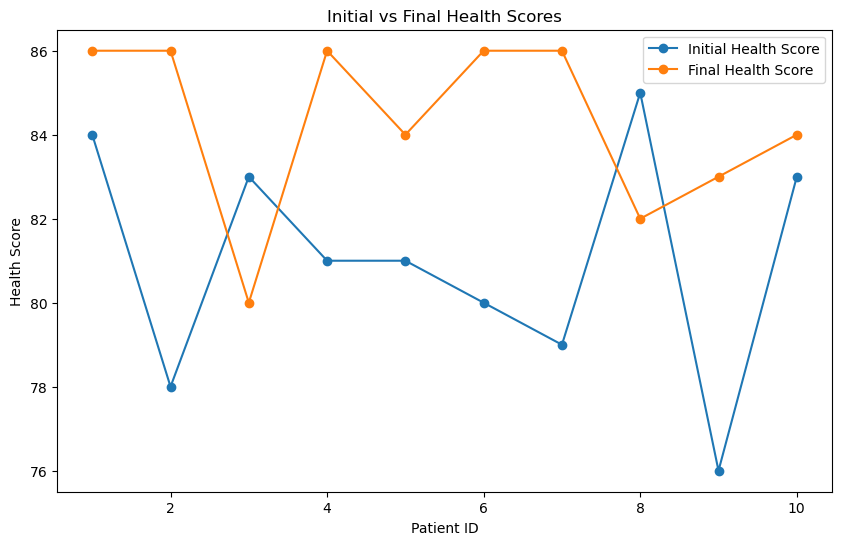

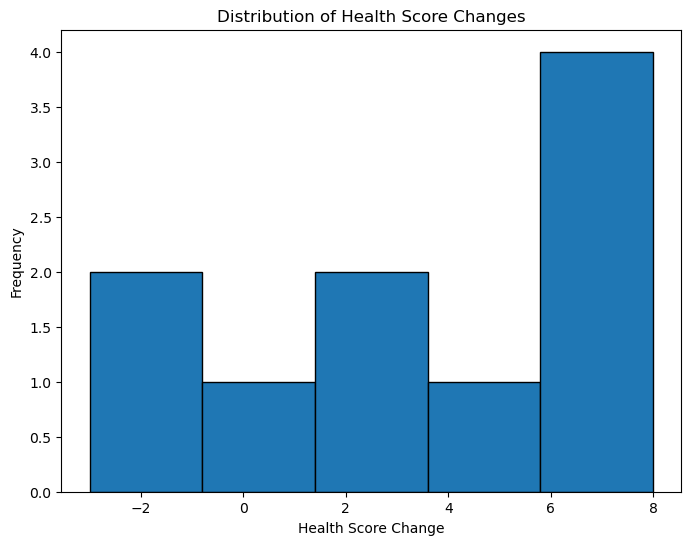

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Add a column for health score change
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Visualize initial and final health scores
plt.figure(figsize=(10, 6))
plt.plot(data['PatientID'], data['InitialHealthScore'], marker='o', label='Initial Health Score')
plt.plot(data['PatientID'], data['FinalHealthScore'], marker='o', label='Final Health Score')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores')
plt.legend()
plt.show()

# Visualize the distribution of health score changes
plt.figure(figsize=(8, 6))
plt.hist(data['HealthScoreChange'], bins=5, edgecolor='black')
plt.title('Distribution of Health Score Changes')
plt.xlabel('Health Score Change')
plt.ylabel('Frequency')
plt.show()


Using bootstrap method

In [4]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrapping
def bootstrap_confidence_interval(data, n_bootstrap=1000, ci=95):
    """
    Computes a confidence interval for the mean using bootstrapping.
    
    Parameters:
    - data: array-like, the sample data (health score changes).
    - n_bootstrap: the number of bootstrap samples.
    - ci: the confidence interval percentage (e.g., 95 for 95% CI).
    
    Returns:
    - lower_bound, upper_bound: the bounds of the confidence interval.
    """
    bootstrap_means = []
    for _ in range(n_bootstrap):
        # Create a bootstrap sample
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the mean of the bootstrap sample
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Compute percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_means, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Extract health score changes
health_score_changes = data['HealthScoreChange'].values

# Compute 95% bootstrap confidence interval for the mean health score change
ci_lower, ci_upper = bootstrap_confidence_interval(health_score_changes)
print(f"95% Bootstrap Confidence Interval for Mean Health Score Change: [{ci_lower:.2f}, {ci_upper:.2f}]")


95% Bootstrap Confidence Interval for Mean Health Score Change: [0.70, 5.50]


Supporting the visualizations

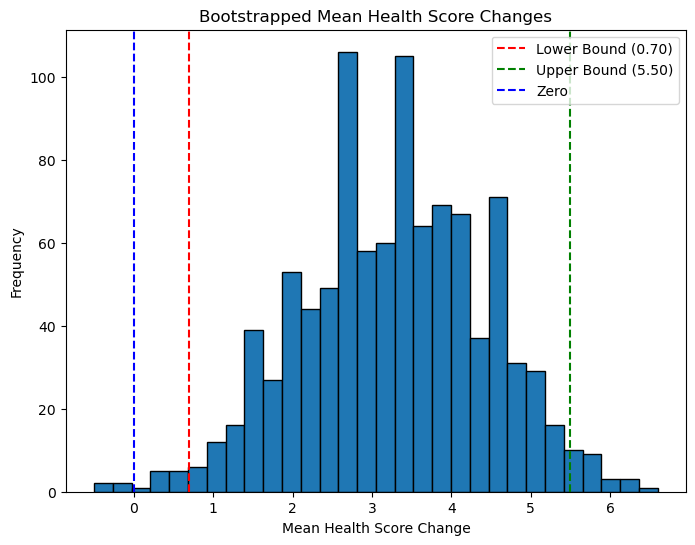

In [5]:
# Visualizing the bootstrapped means
plt.figure(figsize=(8, 6))
bootstrap_means = [np.mean(np.random.choice(health_score_changes, size=len(health_score_changes), replace=True)) for _ in range(1000)]
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower Bound ({ci_lower:.2f})')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'Upper Bound ({ci_upper:.2f})')
plt.axvline(0, color='blue', linestyle='--', label='Zero')
plt.title('Bootstrapped Mean Health Score Changes')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Conclusion is that the vaccine has no effect because based on the bootstrap confidence level, 0 isn't included indicating "that the data does not provide strong evidence of the vaccine’s effectiveness". A larger sample size might have produced another outcome different to the original one.

# 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes, mostly

# ChatGPT chat summary and convo link

In this chat, you asked for help with a Vaccine Data Analysis Assignment to evaluate the effectiveness of a vaccine developed by AliTech. The task involves using bootstrapping to test the hypothesis that the vaccine improves health.

1. Problem Introduction: We formulated the null hypothesis (H₀) that the vaccine has no effect on health and an alternative hypothesis (H₁) that it improves health.

2. Data Visualization: We created visualizations comparing initial and final health scores for patients and plotted the distribution of health score changes.

3. Quantitative Analysis: A bootstrapping method was used to estimate a 95% confidence interval for the mean health score change, which allows us to assess whether the vaccine had a significant effect.

4. Conclusion: Depending on whether the confidence interval includes zero, we either reject or fail to reject the null hypothesis.

5. Further Considerations: Larger sample sizes and subgroup analyses could enhance the reliability of the results.

You were provided with commented Python code for bootstrapping, data visualization, and analysis, with the flexibility to extend it to other population parameters like the median.

https://chatgpt.com/share/66fc63cb-dbdc-8006-bd2d-41f2dcb4c40a